# Прогноз модели, обученной на основе 2D проекций

In [133]:
from n2v.models import N2V
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread
from csbdeep.io import save_tiff_imagej_compatible

## Загрузка модели

In [134]:
# Ранее обученная модель загружается путем создания нового N2V-объекта без указания конфигурации
model_name = 'n2v_2D'
basedir = 'models'
model = N2V(config=None, name=model_name, basedir=basedir)

Loading network weights from 'weights_best.h5'.


## Прогноз (denoising)

In [171]:
model.config.axes='YXC'

In [172]:
# Загрузка изображения для понижения шума.
input_train = imread('data_ML/beton_noise_rings_artefacts/rec_00300.tif')[...,None]

# Параметр 'n_tiles' можно настроить, если изображения слишком велики для памяти GPU.
# Если мы не укажем параметр n_tiles, система автоматически попытается найти подходящий тайлинг.
pred_train = []
for _x in input_train[:3000]:
    _yp = model.predict(_x, axes='YX', n_tiles=(1,1))
    pred_train.append(_yp)
pred_train = np.array(pred_train)

The input image is of type uint16 and will be casted to float32 for prediction.
1/1 [==============================] - 0s 27ms/step
The input image is of type uint16 and will be casted to float32 for prediction.
1/1 [==============================] - 0s 31ms/step
The input image is of type uint16 and will be casted to float32 for prediction.
1/1 [==============================] - 0s 28ms/step
The input image is of type uint16 and will be casted to float32 for prediction.
1/1 [==============================] - 0s 29ms/step
The input image is of type uint16 and will be casted to float32 for prediction.
1/1 [==============================] - 0s 28ms/step
The input image is of type uint16 and will be casted to float32 for prediction.
1/1 [==============================] - 0s 32ms/step
The input image is of type uint16 and will be casted to float32 for prediction.
1/1 [==============================] - 0s 28ms/step
The input image is of type uint16 and will be casted to float32 for predicti

### Результат

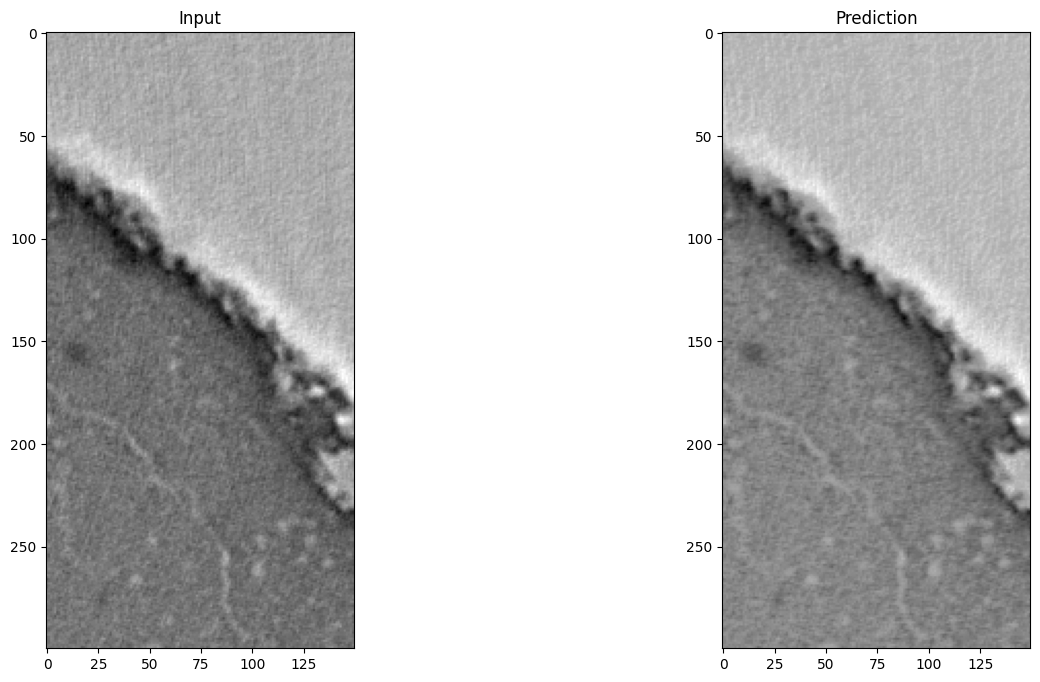

In [173]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(input_train[1700:2000,1850:2000,0],cmap="binary")
plt.title('Input');
plt.subplot(1,2,2)
plt.imshow(pred_train[1700:2000,1850:2000,0],cmap="binary")
plt.title('Prediction');

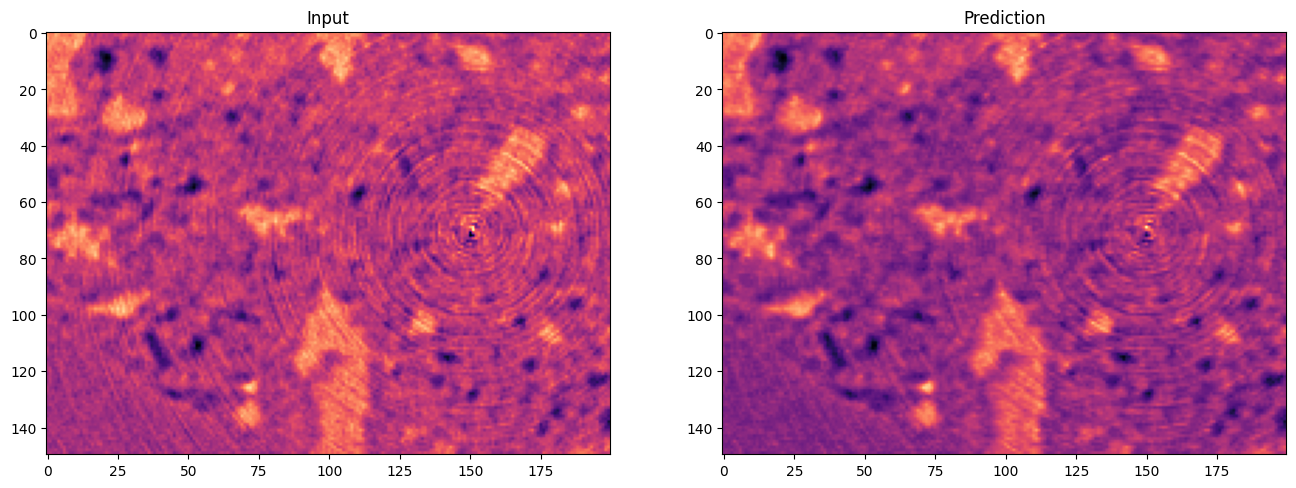

In [190]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(input_train[1700:1850,1300:1500,0],cmap="magma")
plt.title('Input');
plt.subplot(1,2,2)
plt.imshow(pred_train[1700:1850,1300:1500,0],cmap="magma")
plt.title('Prediction');

## Сохранение изображений

In [8]:
save_tiff_imagej_compatible('pred.tif', pred_train, axes='YXC')